In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

class ChessBoard:
    def __init__(self, position):
        self.board = self.create_board(position)
        self.sprites = self.split_sprites()
        self.sprite_lookup = {
            'K' : 1,
            'Q' : 2,
            'B' : 3,
            'N' : 4,
            'R' : 5,
            'P' : 6,
            'k' : 7,
            'q' : 8,
            'b' : 9,
            'n' : 10,
            'r' : 11,
            'p' : 12,
        }

    def split_sprites(self):
        sprite_sheet_path = "piecesprite.png"
        sprite_sheet = Image.open(sprite_sheet_path)
        rows = 2  
        columns = 6
        sheet_width, sheet_height = sprite_sheet.size
        
        sprite_width = sheet_width // columns
        sprite_height = sheet_height // rows
        
        sprites = []
        
        # Iterate over rows and columns to extract individual sprites
        for y in range(0, sheet_height, sprite_height):
            for x in range(0, sheet_width, sprite_width):
                box = (x, y, x + sprite_width, y + sprite_height)
                sprite = sprite_sheet.crop(box)
                sprites.append(sprite)
        
        return sprites
    
    def create_board(self, position):
        board = []
        for i in position:
            if len(board) < 64:
                if i.isdigit(): 
                    for _ in range(int(i)): board.append([" * "])
                elif i == '/': continue
                else: board.append([' ' + i + ' '])
        board = np.array(board).reshape(8,8)
        # print(board)
        return board
    
    def print_board(self):
        for i in self.board: 
            line = ""
            for j in i:
                line += j
            print(line)
    
    def spawn_image(self, fig, ax, image_num, position):
        position = (position[0]-0.5, position[1]-0.5)
        img = self.sprites[image_num]
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, position, frameon=False)
        ax.add_artist(ab)

    def display_board(self):
        board_size = 8
        square_size = 1.0
        fig, ax = plt.subplots()
        
        # Add squares to represent the chessboard
        for i in range(board_size):
            for j in range(board_size):
                color = 'brown' if (i + j) % 2 == 0 else 'BurlyWood'  # Alternating colors
                rect = patches.Rectangle((i, j), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
                ax.add_patch(rect)

        ax.set_xlim(0, board_size)
        ax.set_ylim(0, board_size)
        ax.set_xticks(np.arange(0, board_size, 1))
        ax.set_yticks(np.arange(0, board_size, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(which='both', color='black', linestyle='-', linewidth=2)
        
        for i in range(board_size):
            for j in range(board_size):
                if self.board[i][j] == " * ":
                    continue
                else:
                    # print(self.board[i][j])
                    image = self.sprite_lookup[self.board[i][j].strip()] -1
                    self.spawn_image(fig, ax, image, (j+1, i+1))

        # Ensure squares are perfect squares and not rectangles
        ax.set_aspect('equal')
        plt.show()

board = ChessBoard("rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1")
# board.display_board()

board.print_board()

 r  n  b  q  k  b  n  r 
 p  p  p  p  p  p  p  p 
 *  *  *  *  *  *  *  * 
 *  *  *  *  *  *  *  * 
 *  *  *  *  P  *  *  * 
 *  *  *  *  *  *  *  * 
 P  P  P  P  *  P  P  P 
 R  N  B  Q  K  B  N  R 


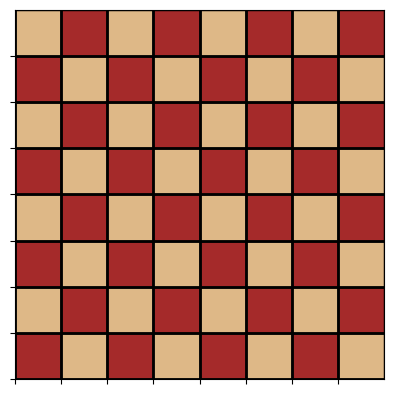

In [45]:


# Define the size of the chessboard


# Define the size of each square in the chessboard


# Function to draw the chessboard

# Method to spawn images in certain squares


# Example: Draw the chessboard and spawn an image in a certain square
draw_chessboard()
# spawn_image(fig, ax, 'piecesprite.png', (2, 3))  # Spawn the image at position (2, 3)


In [60]:
from PIL import Image



sprites = split_sprites()

sprites[11].show()